### Load Dataset

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
data=np.load("dataset/olivetti_faces.npy")
target=np.load("dataset/olivetti_faces_target.npy")

### Show Image information

In [3]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [4]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


### Show Image

In [10]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

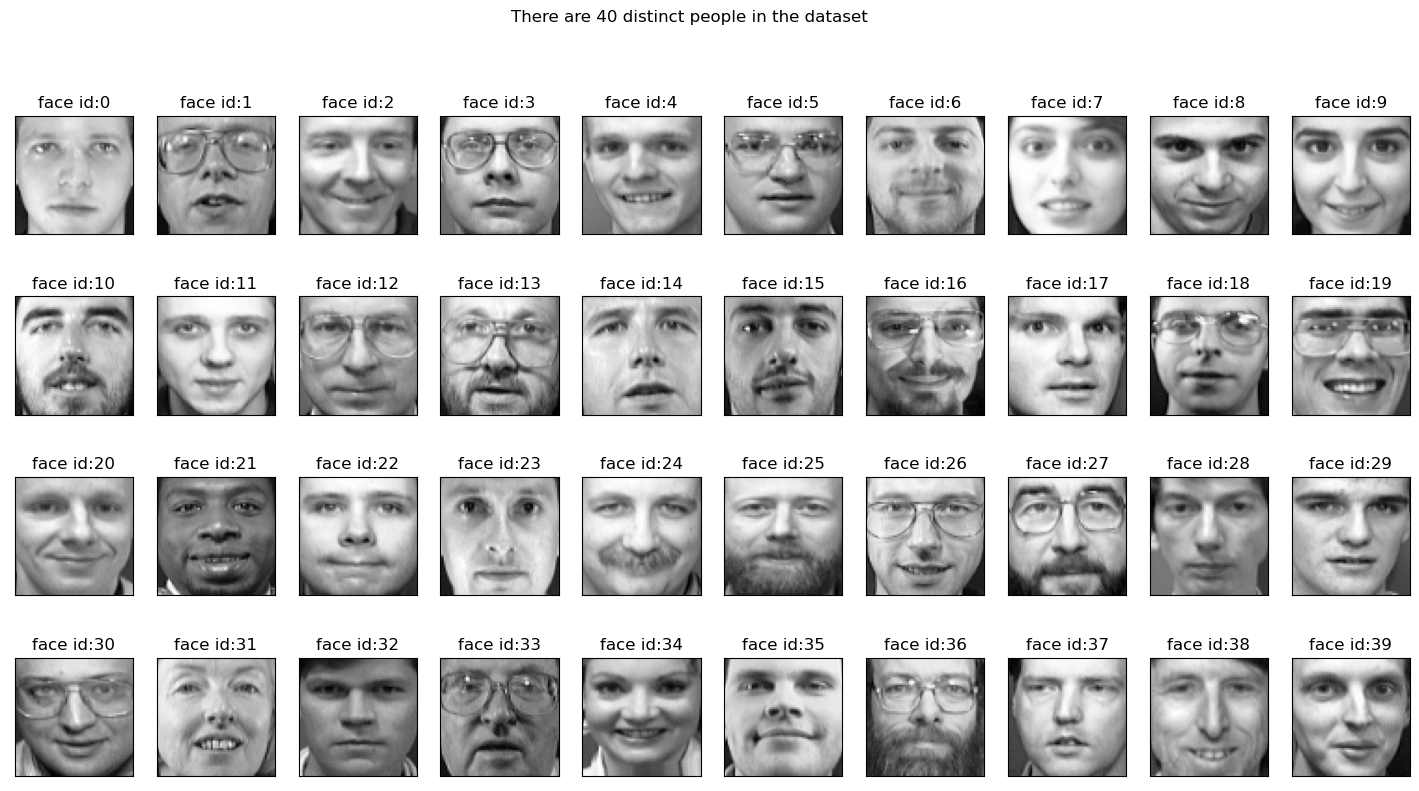

In [11]:
show_40_distinct_people(data, np.unique(target))

### Show Target Image

In [12]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

In [13]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

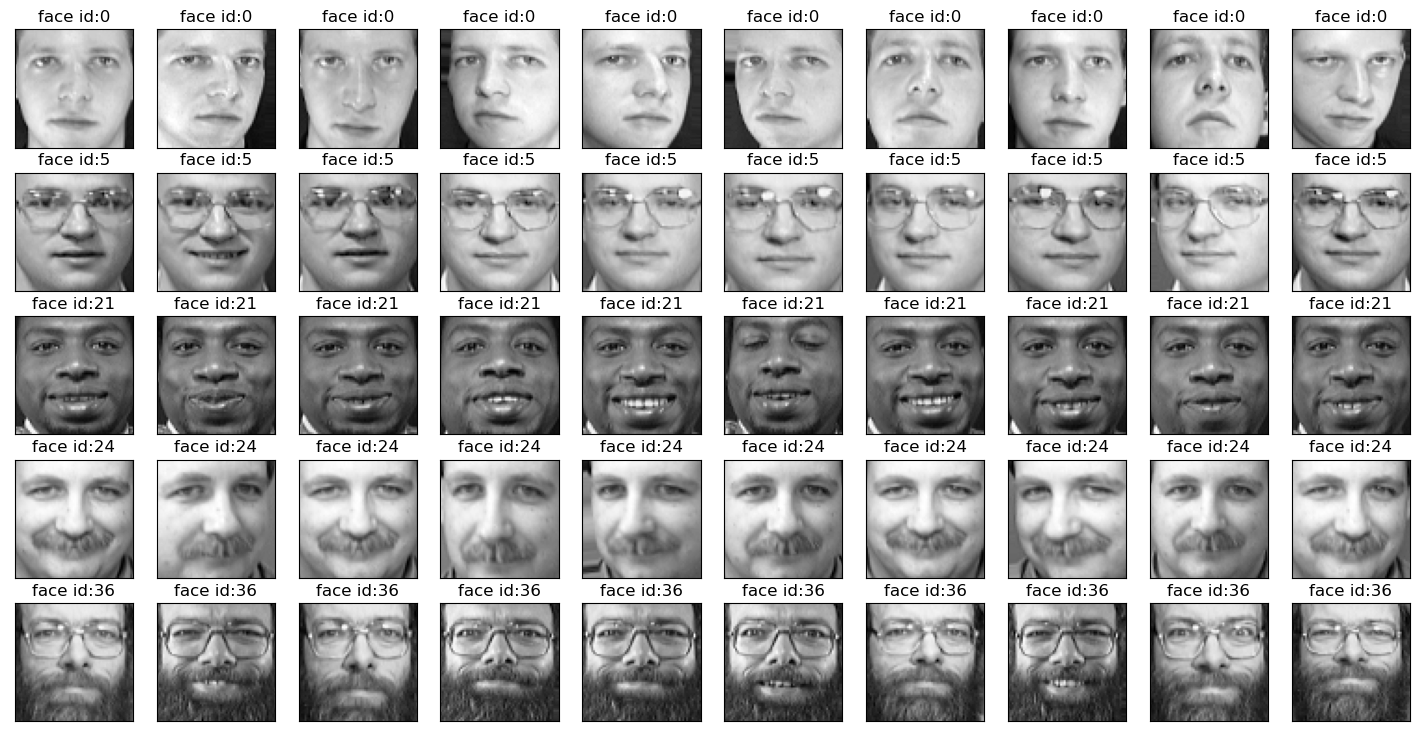

In [14]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [15]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

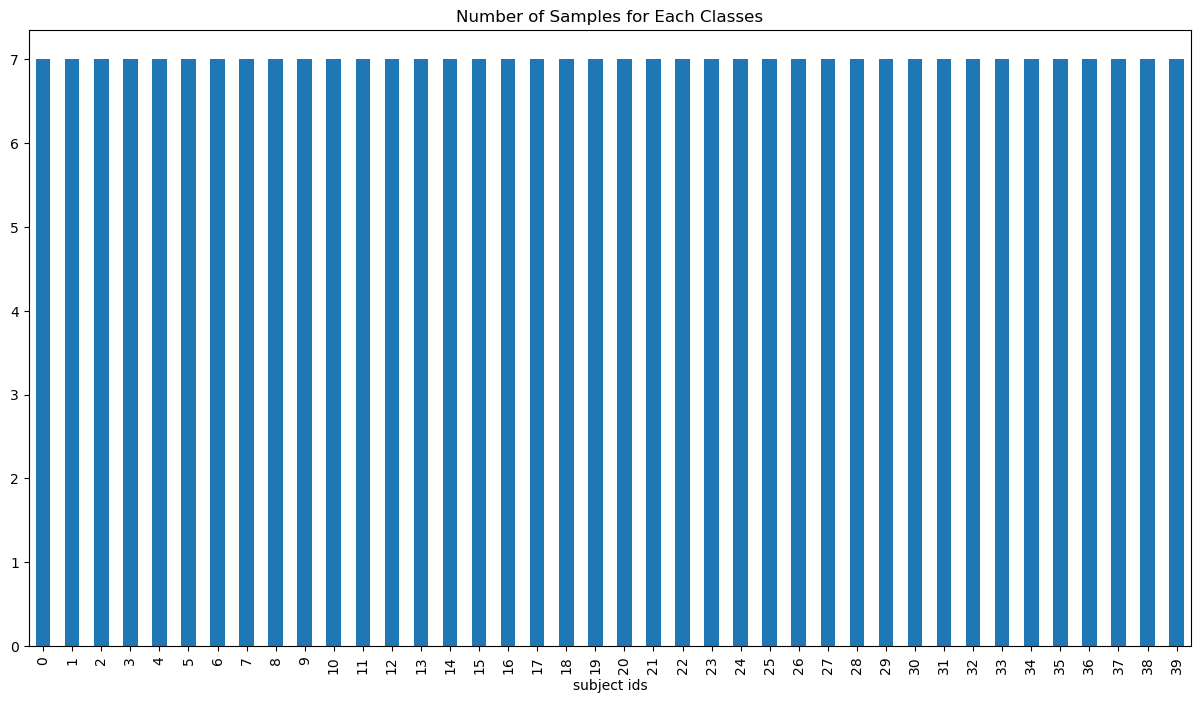

In [30]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [32]:
!pip3 install mglearn

     -------------------------------------- 540.1/540.1 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=17c409a04b75b7019cb411d2693ca5cc3dee220047afd56379b1e08a5101d821
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [44]:
!pip3 install keras

     ---------------------------------------- 1.7/1.7 MB 5.6 MB/s eta 0:00:00


In [46]:
!pip3 install tensorflow

     -------------------------------------- 266.3/266.3 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 502.2 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 605.5 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 7.5 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 8.5 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
     ------------------------------------- 177.2/177.2 kB 10.4 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 7.1 MB/s eta 0:00:00
     -------------------------------------- 1

In [33]:
import mglearn

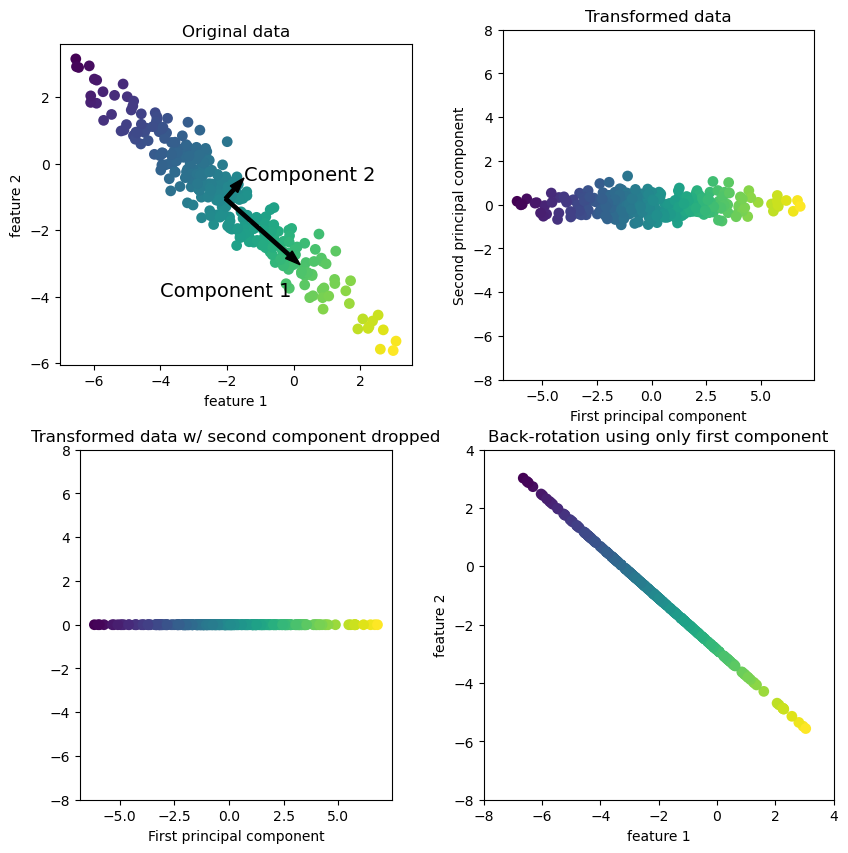

In [34]:
mglearn.plots.plot_pca_illustration()

In [35]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

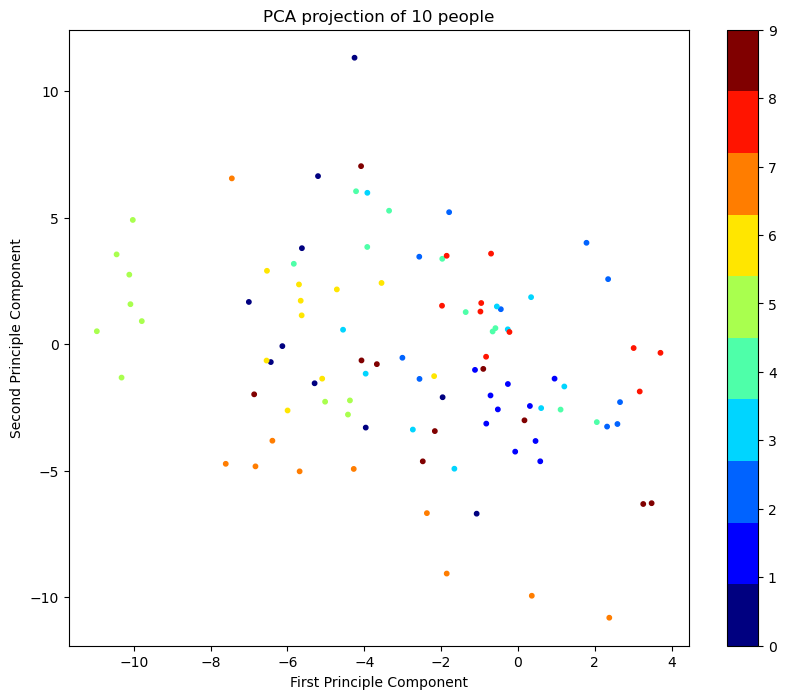

In [36]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

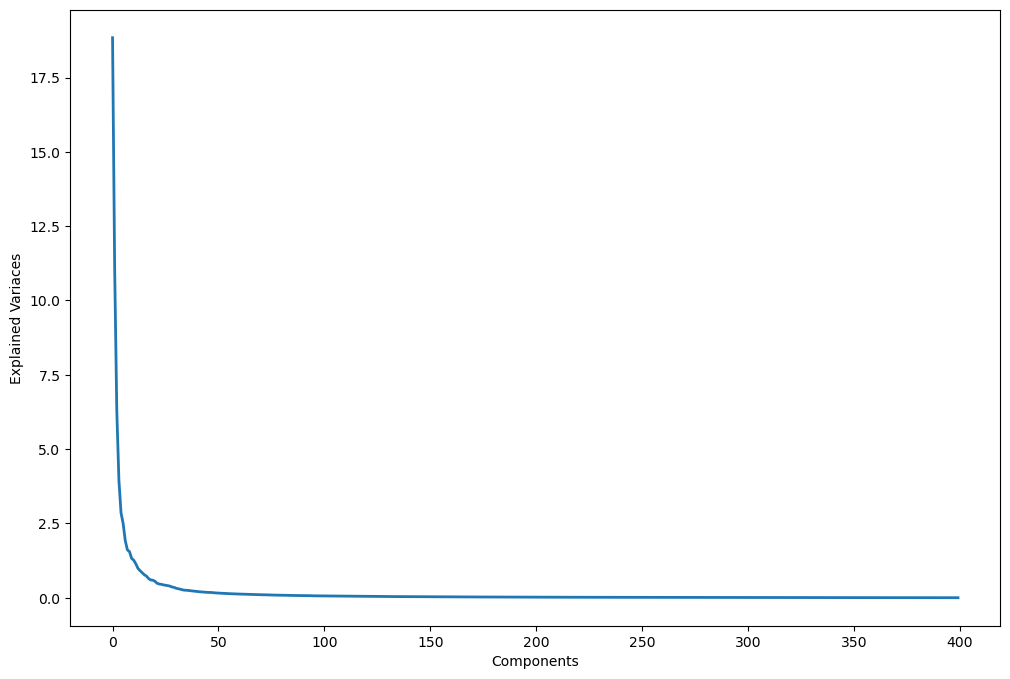

In [37]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [38]:
n_components=90

In [39]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

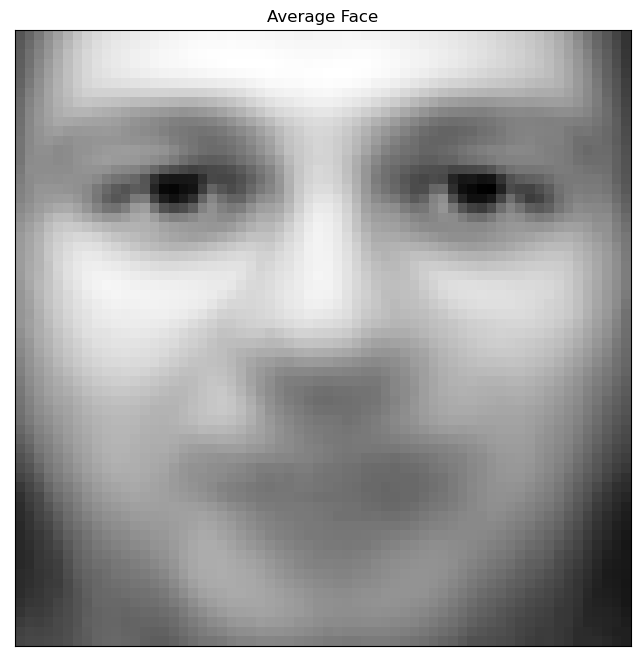

In [40]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

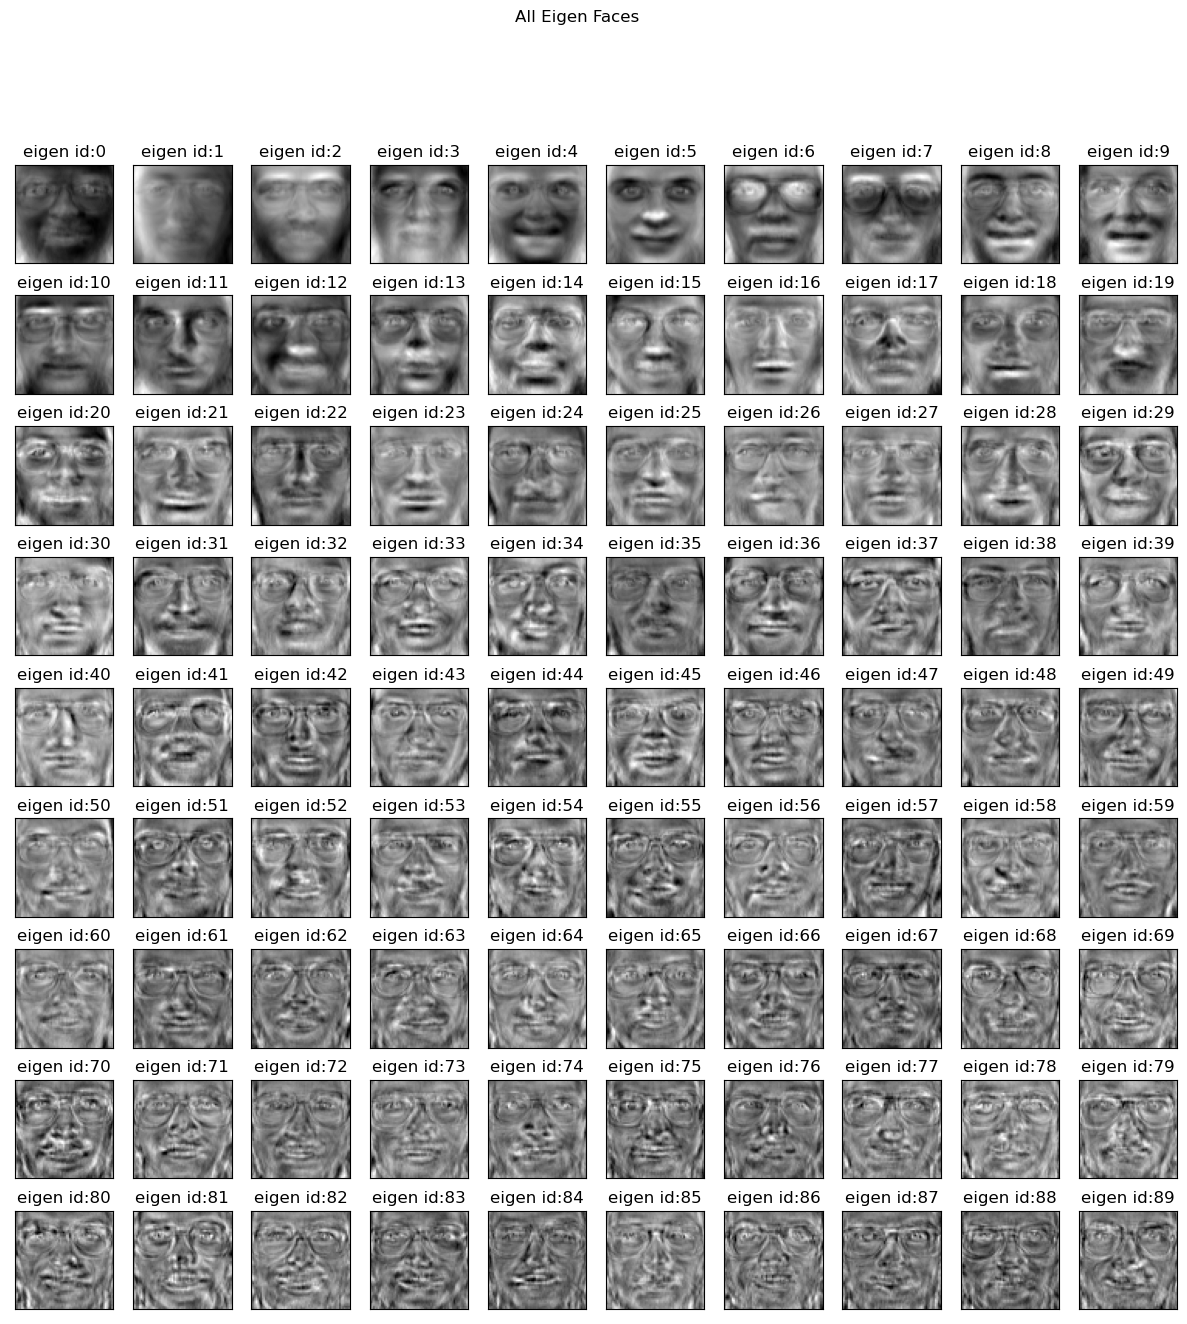

In [41]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [42]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [47]:
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)
print(y_train)

from keras.utils import to_categorical

y_train=to_categorical(y_train,40)
y_test=to_categorical(y_test,40)
print(y_train.shape)

(280, 90)
(280,)
(120, 90)
(120,)
[31 26  9 31 26  5 37 25 13 12 32  7 37 12 22 24 36 24  6  3 26  3 27  3
 22 32  4  2  1 20 29 24 30 34 37 38 25 20 12 35 10 33 27  2 39 16  1  4
 11 11 24 38  4 13 30  3  5  2 35 28  0 21  0 33 23 25 29 27  5  2 14 17
 33 28 34  1 23  6 32 38 36 18 18 33 24 33 16  7 10 30 21 30 11 35  8 22
 33 18 39 26  9  5  2 36 13 15 39 32  6  7  8 38 35 32 34 17  4 11 21 34
 13 32 14 29 23 12 34 37 25 20  6 28 15 24 19  0 24 10 20 14  9 15 21 12
 10 36 17 34 15  3 26  4 35 27 19  9 14 30 31  5 28 34 18 35 20 18 37 16
  2 10 27 36 15 28  1 27 22  9  6 13 14 19 25 16  9  5 30  9  6 18  0 16
 21 23 17 39 18 26 19 15  1 12 25 17 36 16 23  4 22 31 26 14 13  2 21  7
  4 12  7 14 37  3 21 16  8 20  8 27 33 30 28 29  0 37  1 31 11 39 29 38
 35 38 23  5 10 17  1  6 28 15 25  8 23 17 22 11  8 13  7 22  7 39 31 10
  0 19 29 19 36  0 20  8 19 11 32  3 39 38 31 29]
(280, 40)


In [49]:
from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

from keras import regularizers

In [50]:
model=Sequential()
model.add(Dense(256, activation='relu', input_dim=90))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(40, activation='softmax'))

epochs=100
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
model.compile(optimizer=Adam(lr=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               23296     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 40)                5

C:\Users\USER\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [51]:
History = model.fit(X_train_pca,y_train, epochs = epochs, validation_data = (X_test_pca,y_test),batch_size=128, verbose = 1)

Epoch 1/100
3/3 [==============================] - 1s 92ms/step - loss: 3.7411 - accuracy: 0.0321 - val_loss: 3.6203 - val_accuracy: 0.0250
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 3.5769 - accuracy: 0.0571 - val_loss: 3.5488 - val_accuracy: 0.0833
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 3.4813 - accuracy: 0.1107 - val_loss: 3.4765 - val_accuracy: 0.1750
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 3.3638 - accuracy: 0.1929 - val_loss: 3.4031 - val_accuracy: 0.2250
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 3.2308 - accuracy: 0.2321 - val_loss: 3.3187 - val_accuracy: 0.3083
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 3.1163 - accuracy: 0.3286 - val_loss: 3.2160 - val_accuracy: 0.3833
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 2.9593 - accuracy: 0.4036 - val_loss: 3.0994 - val_accuracy: 0.4417
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 25ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.4556 - val_accuracy: 0.9083
Epoch 60/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.4495 - val_accuracy: 0.9167
Epoch 61/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.4420 - val_accuracy: 0.9167
Epoch 62/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.4362 - val_accuracy: 0.9167
Epoch 63/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.4323 - val_accuracy: 0.9250
Epoch 64/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.4298 - val_accuracy: 0.9250
Epoch 65/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.4307 - val_accuracy: 0.9167
Epoch 66/100
3/3 [========

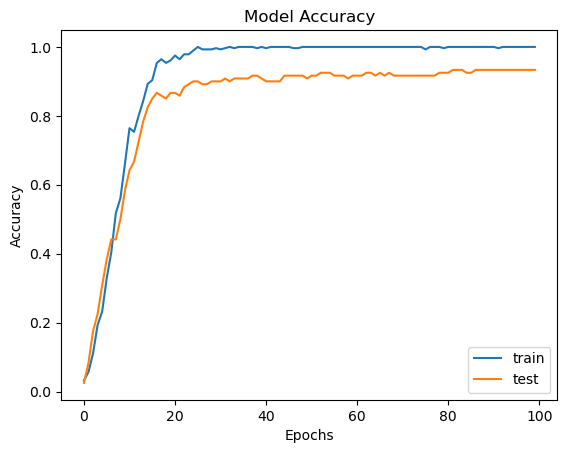

In [56]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

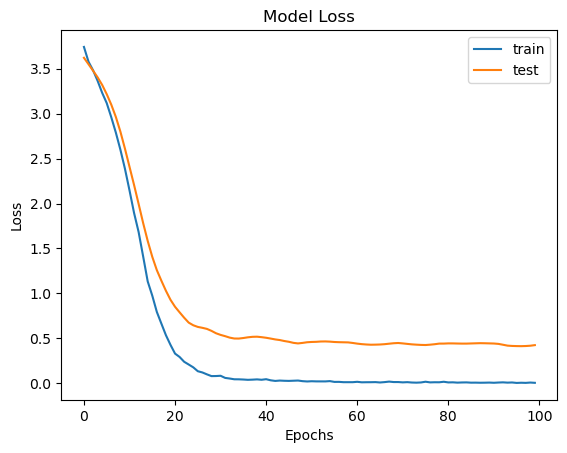

In [57]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()